# Выборка #11

In [16]:
%run init.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Обзор данных

In [17]:
dataset = Dataset(11)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    11   |          1000         |        10000         |      20     |       21.9       |
+---------+-----------------------+----------------------+-------------+------------------+


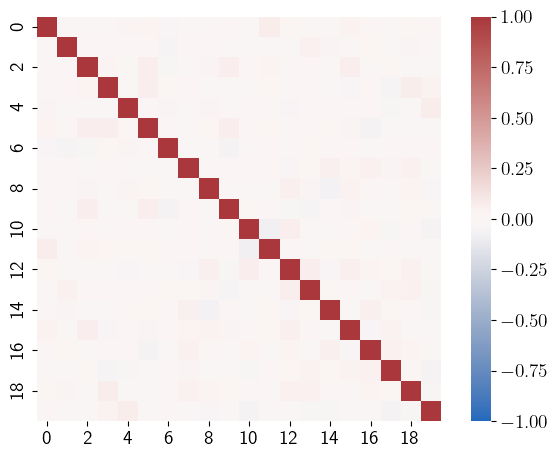

In [3]:
dataset.heatmap()

In [21]:
D_kls = dataset.divergences(verbose=True)

KL-divergence for feature #0: 0.046, Class 1: N(0.114, 0.872), Class 0: N(-0.032, 1.031)
KL-divergence for feature #1: 0.057, Class 1: N(-0.015, 0.835), Class 0: N(0.004, 1.042)
KL-divergence for feature #2: 0.039, Class 1: N(-0.036, 0.862), Class 0: N(0.010, 1.035)
KL-divergence for feature #3: 0.053, Class 1: N(0.101, 0.855), Class 0: N(-0.028, 1.035)
KL-divergence for feature #4: 0.097, Class 1: N(-0.008, 0.792), Class 0: N(0.002, 1.051)
KL-divergence for feature #5: 0.092, Class 1: N(0.125, 0.815), Class 0: N(-0.035, 1.043)
KL-divergence for feature #6: 0.087, Class 1: N(-0.014, 0.802), Class 0: N(0.004, 1.049)
KL-divergence for feature #7: 0.104, Class 1: N(-0.039, 0.788), Class 0: N(0.011, 1.051)
KL-divergence for feature #8: 0.090, Class 1: N(0.074, 0.805), Class 0: N(-0.021, 1.047)
KL-divergence for feature #9: 0.137, Class 1: N(-0.106, 0.771), Class 0: N(0.030, 1.053)
KL-divergence for feature #10: 0.064, Class 1: N(-0.005, 0.827), Class 0: N(0.001, 1.043)
KL-divergence for fe

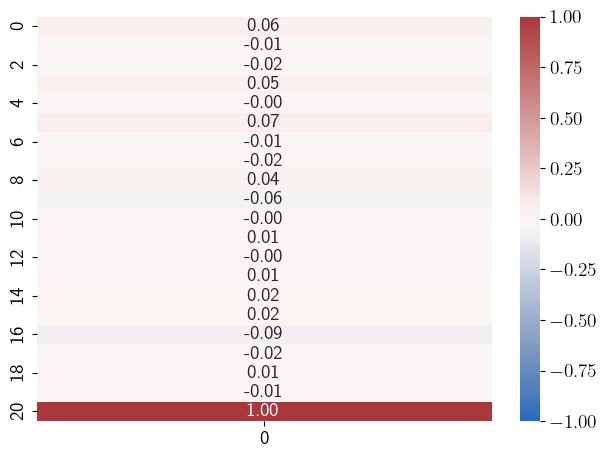

In [4]:
dataset.target_corr()

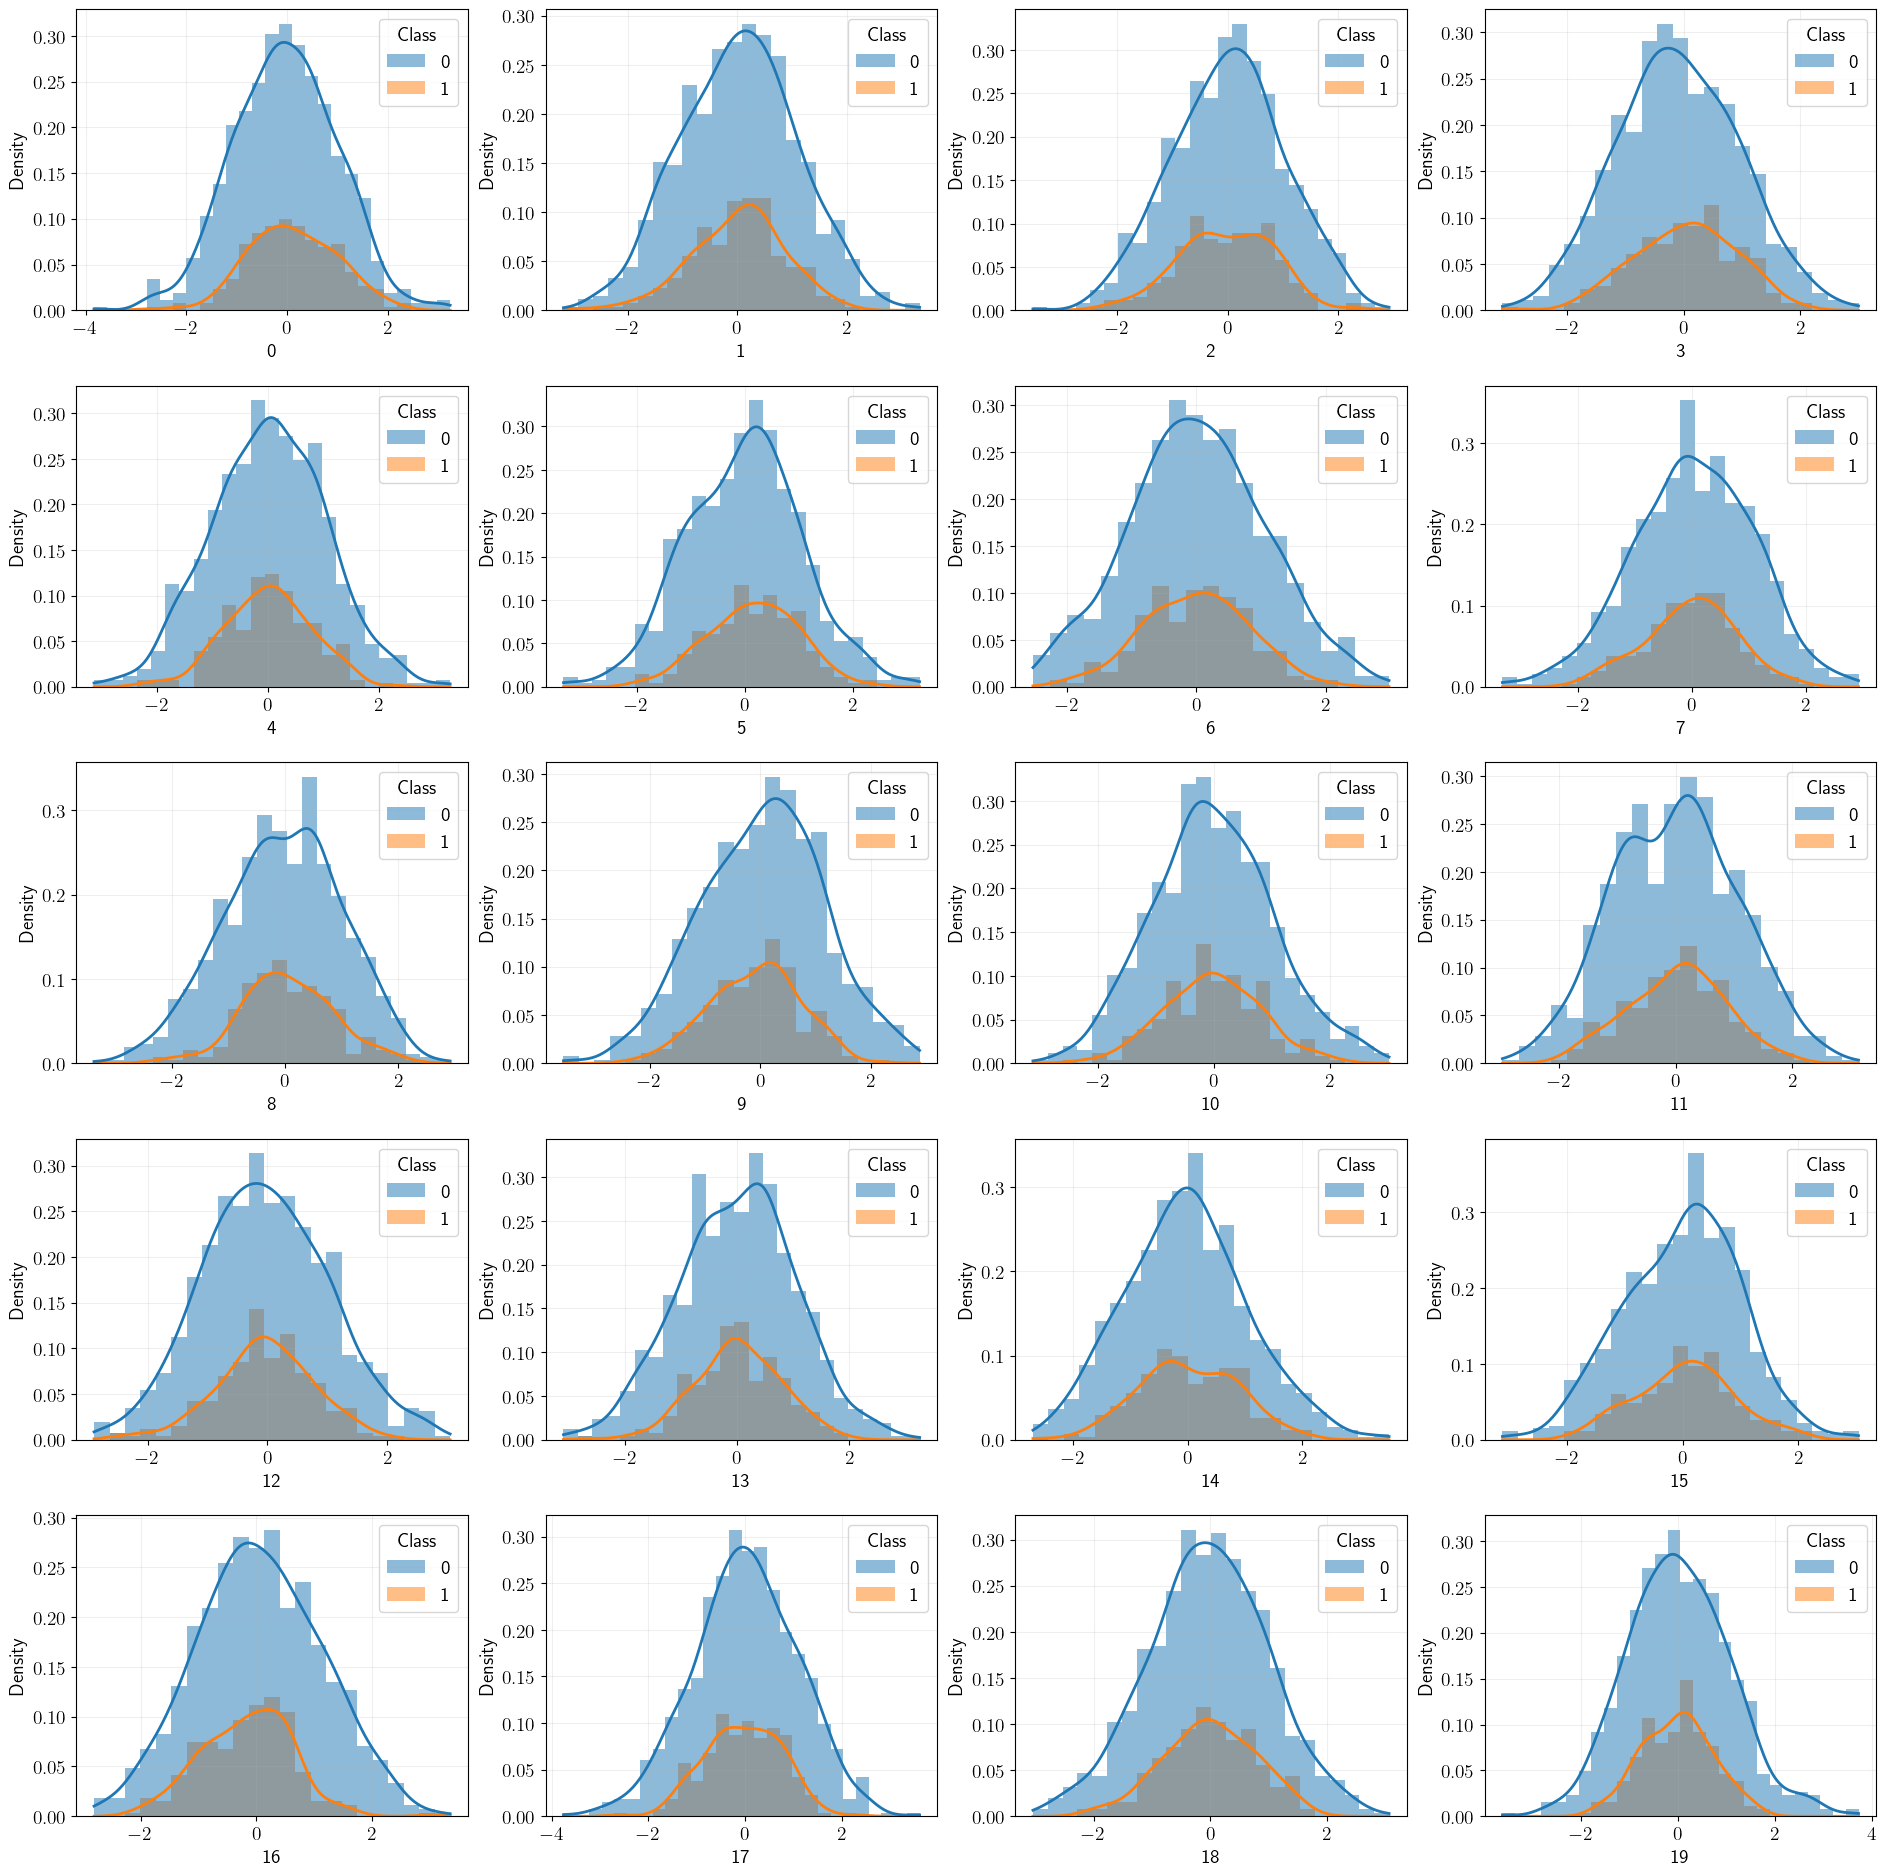

In [5]:
make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [4]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

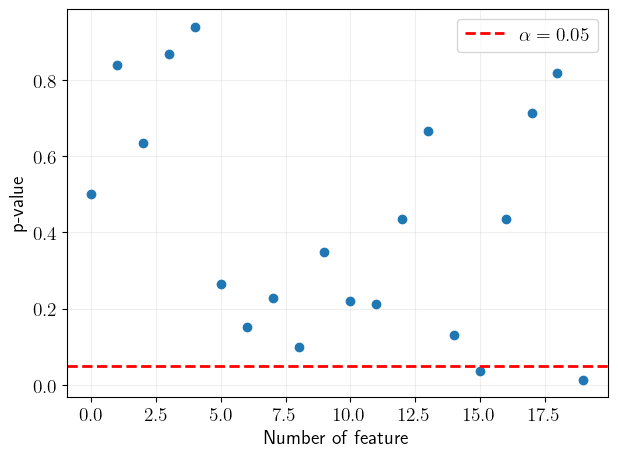

In [7]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

In [5]:
selected_columns = []

for index, p_value in enumerate(pvals):
    # Проверка условия
    if p_value > 0.05:
        # Добавление индекса столбца в список
        selected_columns.append(index)

### Logistic Regression

100%|██████████| 20/20 [00:08<00:00,  2.30it/s]


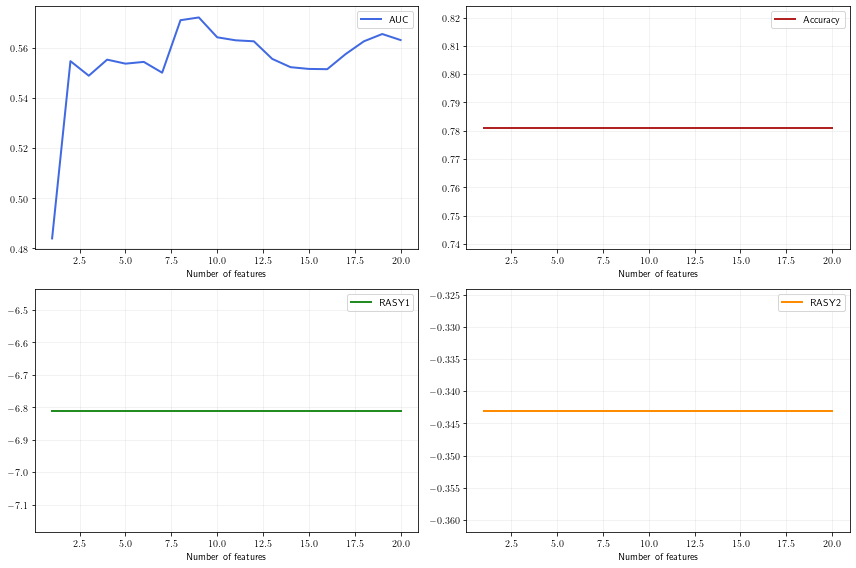

In [7]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression(), ks=None,  save=False)

100%|██████████| 21/21 [00:25<00:00,  1.22s/it]


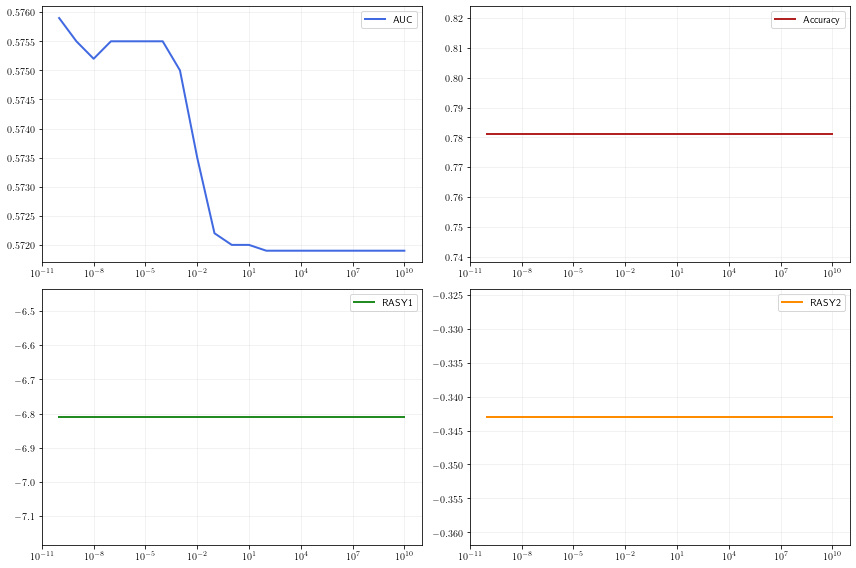

In [8]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-10, 10, 21), save=False)

### Наивный байес

100%|██████████| 20/20 [00:06<00:00,  3.24it/s]


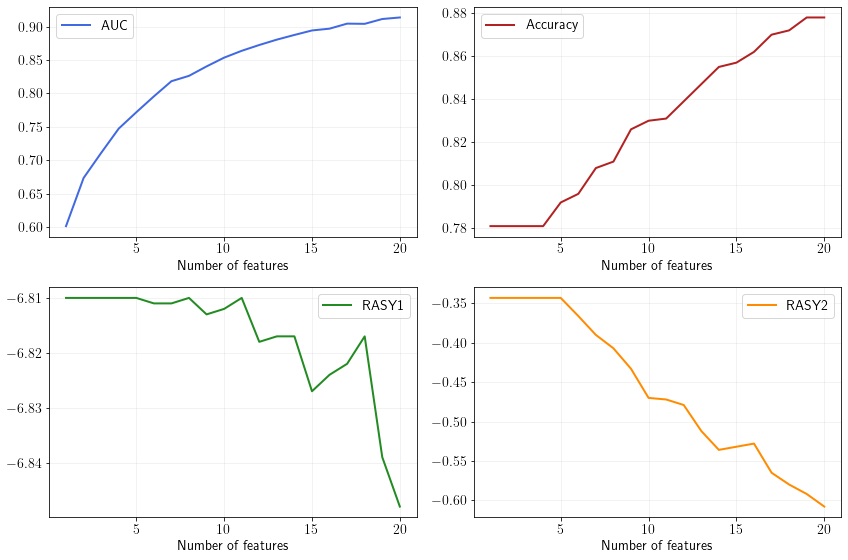

In [19]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB(), save=True)

### CatBoost (не показал себя)

In [12]:
#fit_params = {"verbose" : False, "plot" : False}

In [9]:
#dataset.metrics_n_features_dependence(CatBoostClassifier(), fit_params=fit_params,
                                      #ks=[19])

In [ ]:
#features_cb, cols_cb = dataset.feature_selection(n_cols=19)

In [10]:
#depths = [2, 3, 4, 5, 6, 7]
#CatBoostClassifierValidate(dataset, features_cb, depths)

### Saving aswers 

In [20]:
model_AUC = GaussianNB()
model_Accuracy = GaussianNB()
model_RASY1 = GaussianNB()
model_RASY2 = GaussianNB()
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [21]:
features_AUC, cols_AUC = features_cols_gnb['AUC']['features'], features_cols_gnb['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_gnb['Accuracy']['features'], features_cols_gnb['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_gnb['RASY1']['features'], features_cols_gnb['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_gnb['RASY2']['features'], features_cols_gnb['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [22]:
t_Accuracy = features_cols_gnb['Accuracy']['t']
t_RASY1 = features_cols_gnb['RASY1']['t']
t_RASY2 = features_cols_gnb['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [23]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)